In [1]:
import orbipy as op
import numpy as np
import pandas as pd
from numba.core.ir import Raise
from numba.np.arrayobj import np_array
from orbipy import plotter
from orbipy.correction import border_correction
from scipy.optimize import bisect


In [30]:
# =========================================================================

In [91]:
from scipy.optimize import bisect
import orbipy as op
import numpy as np
import pandas as pd
import orbipy as op
from orbipy import plotter

model = op.crtbp3_model('Earth-Moon (default)', integrator=op.dopri5_integrator(), stm=True)
one_thousand_kms = (1-model.L1) / 61.350
left = op.eventX(model.L1 - 4 * one_thousand_kms)
# right = op.eventX(model.L1 + 10 * one_thousand_kms)

points = []
dr = 3*one_thousand_kms
initial_state = model.get_zero_state()
initial_state[[0,2]] = [model.L1, 0]
points.append(initial_state[[0, 2]])

def zero_velocity_correction(correction, initial_state, previous_alpha_degrees):
    def find_alpha(alpha_degrees):
        state = model.get_zero_state().copy()
        x = initial_state[0] + np.cos(np.radians(alpha_degrees))*dr
        z = initial_state[2] + np.sin(np.radians(alpha_degrees))*dr
        state[[0,2]] = x, z
        v = correction.calc_dv(0, state)
        # print(v[4])
        return v[4]
        
    # print(initial_state)
    # print("border left", find_alpha(previous_alpha_degrees - 60))
    # print("border right", find_alpha(previous_alpha_degrees + 60))

    res = bisect(find_alpha, previous_alpha_degrees - 30, previous_alpha_degrees + 30, 
        xtol=1e-6, maxiter=100,
        full_output=True)
    
    target_alpha_degrees = res[0]
    print("== alpha", target_alpha_degrees)
    r = np.zeros_like(initial_state)
    x = np.cos(np.radians(target_alpha_degrees))*dr
    z = np.sin(np.radians(target_alpha_degrees))*dr
    r[[0, 2]] = x, z
    return r, target_alpha_degrees
    
alpha = 90

for i in range(45):
    right = op.eventX(model.L1 + (4+i) * one_thousand_kms)
    correction = op.border_correction(model, op.y_direction(), left, right, maxt=7*np.pi)
    zero_velocity_point_correction, alpha = zero_velocity_correction(correction, initial_state, alpha)
    initial_state += zero_velocity_point_correction
    points.append(initial_state[[0, 2]])
    print(points[-1])
print("==== Finished ====")

== alpha 89.15545731782913
[0.83699613 0.00797573]
== alpha 87.4708503484726
[0.83734812 0.01594456]
== alpha 85.79967767000198
[0.83793236 0.02389973]
== alpha 84.15092289447784
[0.83874524 0.03183481]
== alpha 82.53359109163284
[0.83978176 0.03974377]
== alpha 80.95673739910126
[0.84103552 0.04762122]
== alpha 79.42945092916489
[0.8424988  0.05546245]
== alpha 77.96087980270386
[0.84416255 0.06326361]
== alpha 76.5602096915245
[0.8460165  0.07102177]
== alpha 75.23665130138397
[0.84804915 0.07873503]
== alpha 73.99942427873611
[0.85024788 0.08640261]
== alpha 72.85770535469055
[0.85259895 0.09402485]
== alpha 71.82057827711105
[0.8550876  0.10160329]
== alpha 70.89693903923035
[0.85769809 0.10914063]
== alpha 70.0953957438469
[0.86041376 0.11664071]
== alpha 69.42410409450531
[0.86321712 0.12410847]
== alpha 68.89060288667679
[0.86608989 0.13154979]
== alpha 68.50155293941498
[0.86901312 0.13897144]
== alpha 68.26249748468399
[0.87196729 0.14638082]
== alpha 68.17752420902252
[0.8749

In [93]:
zero_velocity_line = np.array(points)
print(zero_velocity_line)

[[0.83687856 0.        ]
 [0.83699613 0.00797573]
 [0.83734812 0.01594456]
 [0.83793236 0.02389973]
 [0.83874524 0.03183481]
 [0.83978176 0.03974377]
 [0.84103552 0.04762122]
 [0.8424988  0.05546245]
 [0.84416255 0.06326361]
 [0.8460165  0.07102177]
 [0.84804915 0.07873503]
 [0.85024788 0.08640261]
 [0.85259895 0.09402485]
 [0.8550876  0.10160329]
 [0.85769809 0.10914063]
 [0.86041376 0.11664071]
 [0.86321712 0.12410847]
 [0.86608989 0.13154979]
 [0.86901312 0.13897144]
 [0.87196729 0.14638082]
 [0.87493245 0.15378582]
 [0.87788837 0.1611945 ]
 [0.88081479 0.1686149 ]
 [0.88369161 0.17605466]
 [0.88649924 0.1835208 ]
 [0.88921872 0.1910195 ]
 [0.89179566 0.19856838]
 [0.89415056 0.20618944]
 [0.89635658 0.21385492]
 [0.8984027  0.22156462]
 [0.90028074 0.22931698]
 [0.90198468 0.23710946]
 [0.90351152 0.24493857]
 [0.90486038 0.25280029]
 [0.90603243 0.26069031]
 [0.90703049 0.26860422]
 [0.90785926 0.27653765]
 [0.90852418 0.28448649]
 [0.90903156 0.29244693]
 [0.90938802 0.30041556]


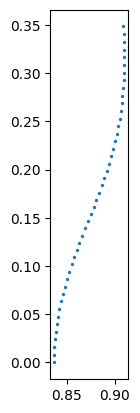

In [99]:
from matplotlib import pyplot as plt

plt.scatter(zero_velocity_line[:,0], zero_velocity_line[:,1], s=2)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
plotter = op.plotter.from_model(model, length_units='Mm', velocity_units='km/s')
ax = plotter.plot_proj(df, centers={'x':model.L1})
plotter.plot_proj(ax=ax, centers={'x':model.L1}, plottables=[plotter.L1, plotter], colors='k',ls='',marker='o')

In [100]:
datatmp = np.array([
       [0.83687856, 0.        ],
       [0.83699613, 0.00797573],
       [0.83734812, 0.01594456],
       [0.83793236, 0.02389973],
       [0.83874524, 0.03183481],
       [0.83978176, 0.03974377],
       [0.84103552, 0.04762122],
       [0.8424988 , 0.05546245],
       [0.84416255, 0.06326361],
       [0.8460165 , 0.07102177],
       [0.84804915, 0.07873503],
       [0.85024788, 0.08640261],
       [0.85259895, 0.09402485],
       [0.8550876 , 0.10160329],
       [0.85769809, 0.10914063],
       [0.86041376, 0.11664071],
       [0.86321712, 0.12410846],
       [0.86608989, 0.13154979],
       [0.86901312, 0.13897143],
       [0.87196729, 0.14638082],
       [0.87493245, 0.15378581],
       [0.87785029, 0.16120958],
       [0.880549,   0.16871579],
       [0.88316644, 0.17625071]])
np.savetxt('zvl_2.txt',zero_velocity_line)
np.save('zvl_2',zero_velocity_line)

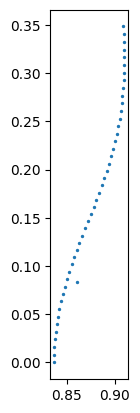

In [19]:
from matplotlib import pyplot as plt

data = np.load('zvl_2.npy')
data = np.append(data, [[0.8605417383927447, 0.08328196115253059]], axis=0)
plt.scatter(data[:,0], data[:,1], s=2)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

In [6]:
# ==================================

In [3]:
def jacoby_constant(model, state):
    x, y, z, vx, vy, vz = state[:6]
    return x**2 + y**2 + 2*((1-model.mu) / np.sqrt((x + model.mu)**2 + y**2 + z**2) + model.mu/np.sqrt((x - 1 + model.mu)**2 + y**2 + z**2)) - (vx**2 + vy**2 + vz**2)

In [3]:
print(jacoby_constant(model, [data[10][0], 0, data[10][1], 0, 0, 0]))

NameError: name 'model' is not defined

In [9]:
model = op.crtbp3_model('Earth-Moon (default)', integrator=op.dopri5_integrator(), stm=True)
one_thousand_kms = (1-model.L1) / 61.350
left = op.eventX(model.L1 - 4 * one_thousand_kms)
right = op.eventX(model.L1 + 10 * one_thousand_kms)

points = []
dr = 5*one_thousand_kms
initial_state = model.get_zero_state()
initial_state[[0,2]] = data[10][0], data[10][1]
points.append(initial_state[[0, 2]])
Cj = jacoby_constant(model, initial_state)

def calculate_next_point_with_same_jacoby_constant(correction, state, cj, previous_alpha_degrees):
    def calculate_velocity(s):
        x, y, z = s[[0, 1, 2]]
        return np.sqrt((x**2 + y**2) + 2*((1-model.mu) / np.sqrt((x + model.mu)**2 + y**2 + z**2) + model.mu/np.sqrt((x - 1 + model.mu)**2 + y**2 + z**2)) - cj)

    def find_alpha(alpha_degrees):
        state = model.get_zero_state().copy()
        x = initial_state[0] + np.cos(np.radians(alpha_degrees))*dr
        z = initial_state[2] + np.sin(np.radians(alpha_degrees))*dr
        state[[0,2]] = x, z
        v_calculated = calculate_velocity(state)
        v = correction.calc_dv(0, state)[4]
        print("velocity: ", v, v_calculated, np.abs(v_calculated - v))
        return v_calculated - np.abs(v)
        
    # print(find_alpha(previous_alpha_degrees-15))

    res = bisect(find_alpha, previous_alpha_degrees - 30, previous_alpha_degrees + 30, 
        xtol=1e-6, maxiter=100,
        full_output=True)
    
    target_alpha_degrees = res[0]
    print("== alpha", target_alpha_degrees)
    r = np.zeros_like(initial_state)
    x = np.cos(np.radians(target_alpha_degrees))*dr
    z = np.sin(np.radians(target_alpha_degrees))*dr
    r[[0, 2]] = x, z
    return r, target_alpha_degrees


alpha = -10


for i in range(3):
    correction = op.border_correction(model, op.y_direction(), left, right, maxt=7*np.pi)
    next_point_with_same_jakoby_constant, alpha = calculate_next_point_with_same_jacoby_constant(correction, initial_state, Cj, alpha)
    initial_state += next_point_with_same_jakoby_constant
    points.append(initial_state[[0, 2]])
    print(points[-1])
print("==== Finished ====")

velocity:  -0.0840669236254153 0.07832566162051921 0.16239258524593453


/tmp/ipykernel_774390/3441350409.py:16: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((x**2 + y**2) + 2*((1-model.mu) / np.sqrt((x + model.mu)**2 + y**2 + z**2) + model.mu/np.sqrt((x - 1 + model.mu)**2 + y**2 + z**2)) - cj)


KeyboardInterrupt: 